In [92]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('sms_data.csv')


In [94]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
df.shape

(5572, 2)

## Steps :
1) Data Cleaning
2) EDA
3) Text Preprocessing
4) Model Building
5) Evaluation
6) Improvement
7) Website
8) Deploy

### Data Cleaning

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [98]:
df['Category'] = le.fit_transform(df['Category'])

In [99]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [101]:
df.duplicated().sum()

np.int64(415)

In [102]:
## Remove duplicates
df = df.drop_duplicates(keep='first')

In [103]:

df.duplicated().sum()

np.int64(0)

In [104]:
df.shape

(5157, 2)

### EDA

In [105]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [106]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


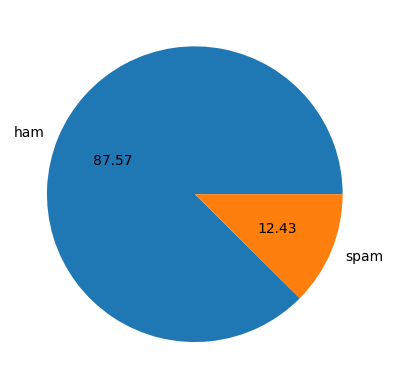

In [107]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [108]:
## Data is imbalanced

In [109]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk in e:\streamlit deploy\myenv1\lib\site-packages (3.8.1)




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import nltk

In [111]:
nltk.download('punkt') ##"Punkt" is a pre-trained model used for tokenizing text, which means splitting a piece of text into individual words or sentences.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
df['num_characters'] = df['Message'].apply(len)

In [113]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [114]:
## Number of words
df['num_words'] = df['Message'].apply(lambda x : len(nltk.word_tokenize(x)))

In [115]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [116]:
## Number of sentences
df['num_sentences'] = df['Message'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [117]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [118]:
df.describe()

,Category,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [119]:
## Describing for ham category
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [120]:
## Describing for spam category
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [121]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

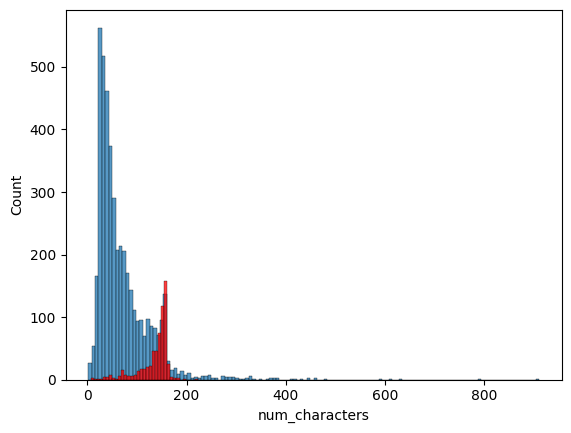

In [123]:
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

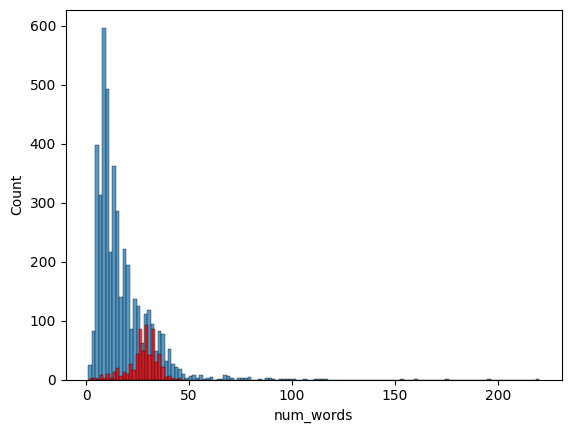

In [124]:
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

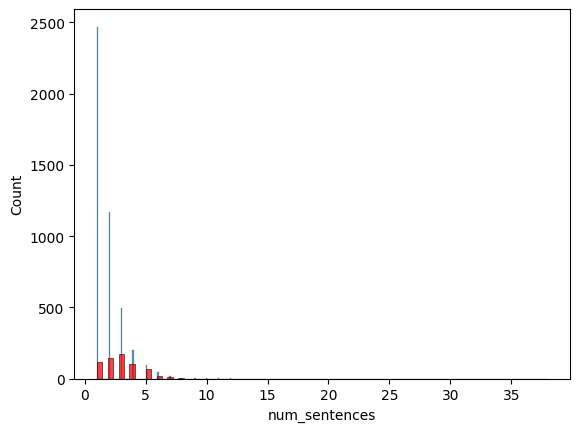

In [125]:
sns.histplot(df[df['Category'] == 0]['num_sentences'])
sns.histplot(df[df['Category'] == 1]['num_sentences'], color='red')

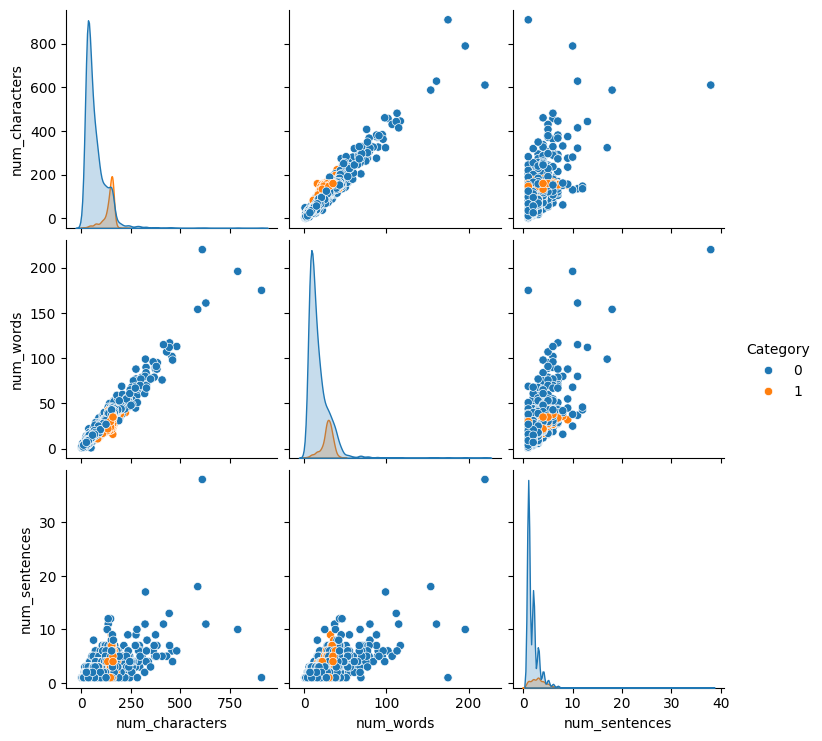

In [126]:
sns.pairplot(df, hue='Category')

### Text Preprocessing
1) Lower case
2) Tokenization
3) Removing special characters
4) Removing stop words and punctuation
5) Stemming

In [127]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [128]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
## Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [130]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if(i.isalnum()):
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    
    
    return " ".join(y)

In [131]:
transform_text("I am walking and running!!!")

'walk run'

In [132]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [133]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [134]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
## Creating wordcloud
from wordcloud import WordCloud

In [136]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [137]:
spam_wc = wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=' '))

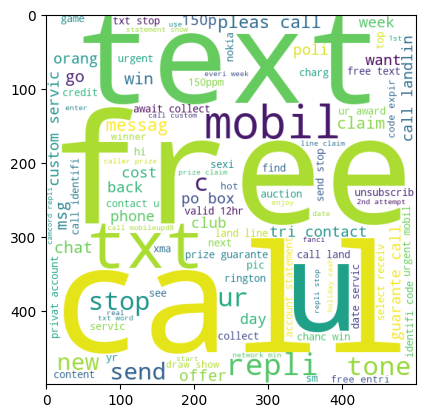

In [138]:
plt.imshow(spam_wc)

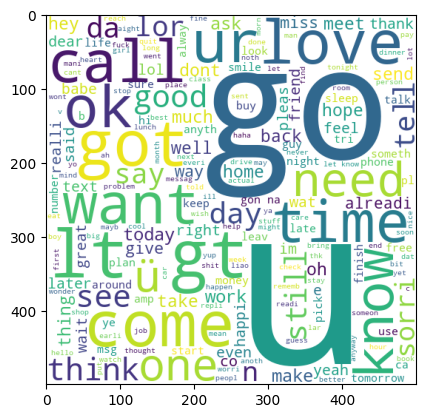

In [139]:
spam_wc = wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

In [140]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
## For spam
spam_corpus = []
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [142]:
len(spam_corpus)

9781

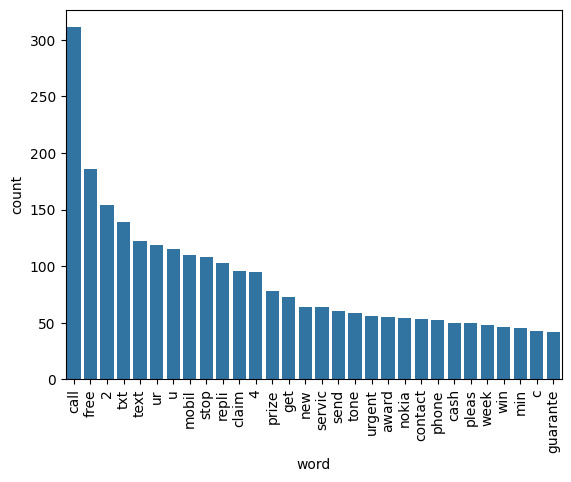

In [143]:
# Count the occurrences of each word
from collections import Counter
word_counts = Counter(spam_corpus)

# Convert the most common words to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['word', 'count'])

# Create the bar plot
sns.barplot(x='word', y='count', data=word_counts_df)
plt.xticks(rotation='vertical')  # Rotate the x labels if needed
plt.show()

In [144]:
## For ham
spam_corpus = []
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

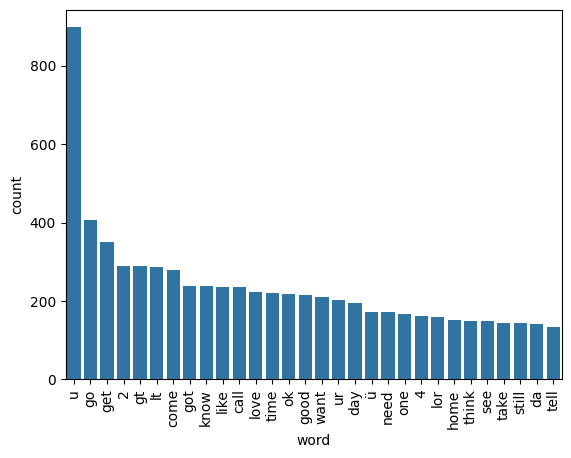

In [145]:
# Count the occurrences of each word
word_counts = Counter(spam_corpus)

# Convert the most common words to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['word', 'count'])

# Create the bar plot
sns.barplot(x='word', y='count', data=word_counts_df)
plt.xticks(rotation='vertical')  # Rotate the x labels if needed
plt.show()

### Model Building

In [146]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [147]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [148]:
X.shape

(5157, 6781)

In [149]:
y = df['Category'].values

In [150]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [151]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [152]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, precision_score, accuracy_score

In [153]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1124
           1       0.53      0.89      0.66       166

    accuracy                           0.88      1290
   macro avg       0.76      0.88      0.80      1290
weighted avg       0.92      0.88      0.90      1290



In [155]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1124
           1       0.87      0.94      0.90       166

    accuracy                           0.97      1290
   macro avg       0.93      0.96      0.94      1290
weighted avg       0.97      0.97      0.97      1290



In [156]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1124
           1       0.96      0.79      0.86       166

    accuracy                           0.97      1290
   macro avg       0.96      0.89      0.92      1290
weighted avg       0.97      0.97      0.97      1290



In [157]:
## TfidfVectorizer
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['Category'].values

In [158]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [159]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1124
           1       0.52      0.89      0.66       166

    accuracy                           0.88      1290
   macro avg       0.75      0.88      0.79      1290
weighted avg       0.92      0.88      0.89      1290



In [160]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1124
           1       1.00      0.80      0.89       166

    accuracy                           0.97      1290
   macro avg       0.99      0.90      0.94      1290
weighted avg       0.97      0.97      0.97      1290



In [161]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1124
           1       0.97      0.87      0.92       166

    accuracy                           0.98      1290
   macro avg       0.97      0.93      0.95      1290
weighted avg       0.98      0.98      0.98      1290



#### Since data is imbalance, accuracy is not considered and for this problem precision is considered. 

### Steps to follow while using new data to predict:
1) transform_text
2) Vectorize
3) model predict

In [162]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

In [163]:
import sklearn
print(sklearn.__version__)

1.5.1
